In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
vacDf = pd.read_excel('/content/drive/MyDrive/Covid/CovidVaccinations.xlsx')


In [3]:
vacDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85171 non-null  object        
 1   continent                              81060 non-null  object        
 2   location                               85171 non-null  object        
 3   date                                   85171 non-null  datetime64[ns]
 4   new_tests                              38945 non-null  float64       
 5   total_tests                            38652 non-null  float64       
 6   total_tests_per_thousand               38652 non-null  float64       
 7   new_tests_per_thousand                 38945 non-null  float64       
 8   new_tests_smoothed                     44625 non-null  float64       
 9   new_tests_smoothed_per_thousand        44625 non-null  float6

In [4]:
vacDf = vacDf.dropna(axis=0)
newVac = vacDf[['continent','location','date','new_tests','total_tests','total_vaccinations','people_vaccinated','people_fully_vaccinated','female_smokers','male_smokers','cardiovasc_death_rate','diabetes_prevalence']]


In [5]:
newVac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 7033 to 85164
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   continent                365 non-null    object        
 1   location                 365 non-null    object        
 2   date                     365 non-null    datetime64[ns]
 3   new_tests                365 non-null    float64       
 4   total_tests              365 non-null    float64       
 5   total_vaccinations       365 non-null    float64       
 6   people_vaccinated        365 non-null    float64       
 7   people_fully_vaccinated  365 non-null    float64       
 8   female_smokers           365 non-null    float64       
 9   male_smokers             365 non-null    float64       
 10  cardiovasc_death_rate    365 non-null    float64       
 11  diabetes_prevalence      365 non-null    float64       
dtypes: datetime64[ns](1), float64(9

In [6]:
newVac['date'] = pd.to_datetime(newVac['date'], errors='coerce')

<ipython-input-6-c2d99fbde65f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newVac['date'] = pd.to_datetime(newVac['date'], errors='coerce')


In [7]:
newVac['month_date'] = newVac['date'].dt.to_period('M')
newVac['year_date'] = newVac['date'].dt.to_period('Y')


<ipython-input-7-272cde4b5d22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newVac['month_date'] = newVac['date'].dt.to_period('M')
<ipython-input-7-272cde4b5d22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newVac['year_date'] = newVac['date'].dt.to_period('Y')


In [8]:
newVac.head()

,continent,location,date,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,female_smokers,male_smokers,cardiovasc_death_rate,diabetes_prevalence,month_date,year_date
7033,Asia,Bangladesh,2021-04-08,33193.0,4915324.0,5664830.0,5583507.0,81323.0,1.0,44.7,298.003,8.38,2021-04,2021
7036,Asia,Bangladesh,2021-04-11,29376.0,5002431.0,6010824.0,5627107.0,383717.0,1.0,44.7,298.003,8.38,2021-04,2021
7037,Asia,Bangladesh,2021-04-12,34968.0,5037399.0,6172159.0,5649563.0,522596.0,1.0,44.7,298.003,8.38,2021-04,2021
7050,Asia,Bangladesh,2021-04-25,21922.0,5345067.0,8145266.0,5818400.0,2326866.0,1.0,44.7,298.003,8.38,2021-04,2021
7051,Asia,Bangladesh,2021-04-26,25786.0,5370853.0,8277514.0,5819291.0,2458223.0,1.0,44.7,298.003,8.38,2021-04,2021


In [9]:
newVac['month_date_str'] = newVac['month_date'].dt.strftime('%Y-%m')

<ipython-input-9-fd6e028d740e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newVac['month_date_str'] = newVac['month_date'].dt.strftime('%Y-%m')


In [10]:
newVac = newVac.sort_values(by='month_date_str')
newVac.reset_index(drop=True)
newVac.head()

,continent,location,date,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,female_smokers,male_smokers,cardiovasc_death_rate,diabetes_prevalence,month_date,year_date,month_date_str
49881,North America,Mexico,2021-01-31,7206.0,4499511.0,673327.0,631485.0,41842.0,6.9,21.4,152.783,13.06,2021-01,2021,2021-01
49879,North America,Mexico,2021-01-29,40048.0,4471651.0,662217.0,630820.0,31397.0,6.9,21.4,152.783,13.06,2021-01,2021,2021-01
49878,North America,Mexico,2021-01-28,43634.0,4431603.0,657842.0,626528.0,31314.0,6.9,21.4,152.783,13.06,2021-01,2021,2021-01
49877,North America,Mexico,2021-01-27,46229.0,4387969.0,656044.0,624730.0,31314.0,6.9,21.4,152.783,13.06,2021-01,2021,2021-01
49876,North America,Mexico,2021-01-26,47248.0,4341740.0,652319.0,621005.0,31314.0,6.9,21.4,152.783,13.06,2021-01,2021,2021-01


<Axes: xlabel='month_date_str', ylabel='people_fully_vaccinated'>

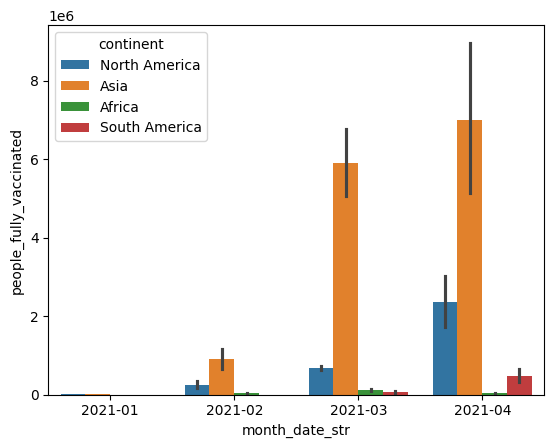

In [11]:
sns.barplot(data=newVac,x='month_date_str',y='people_fully_vaccinated',hue='continent')


In [12]:
asia_df=newVac[newVac['continent']=='Asia']
n_america=newVac[newVac['continent']=='North America']
setattr_amerina=[newVac['continent']=='South America']
africa_df=[newVac['continent']=='Africa']



In [13]:
n_america['location'].unique()

array(['Mexico', 'El Salvador'], dtype=object)

<ipython-input-14-b72e8eae569c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=asia_df,x='location',y='people_vaccinated',palette='tab10')


<Axes: xlabel='location', ylabel='people_vaccinated'>

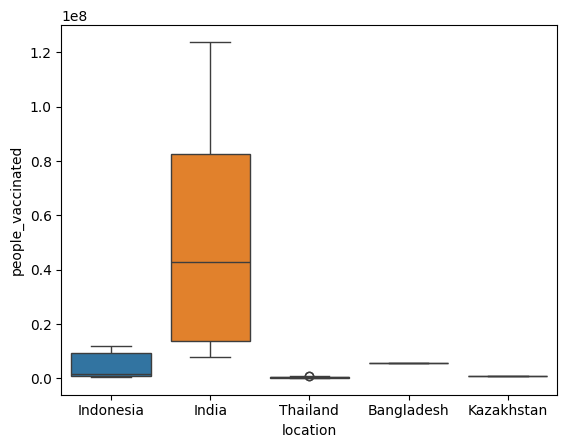

In [14]:
sns.boxplot(data=asia_df,x='location',y='people_vaccinated',palette='tab10')

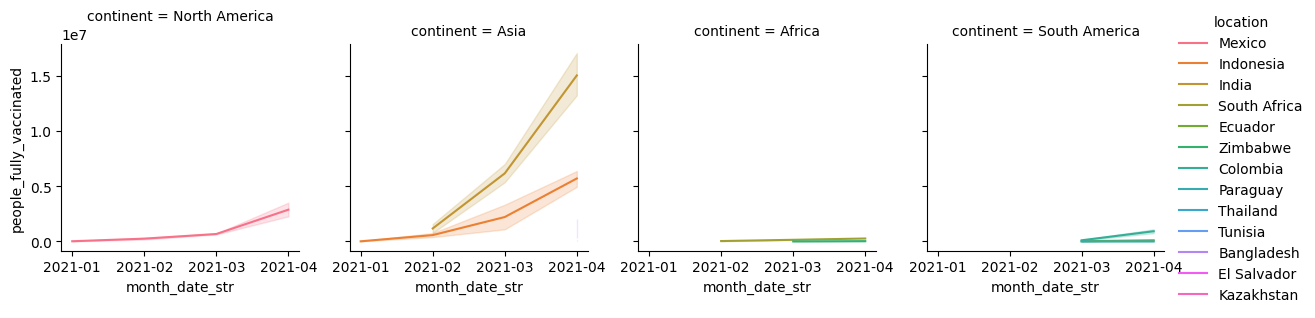

In [15]:
graph = sns.FacetGrid(newVac,col='continent',hue='location')
graph.map(sns.lineplot,'month_date_str','people_fully_vaccinated',estimator='mean')
graph.add_legend()

In [16]:
newVac['Max_people_fully_vaccinated']=newVac.groupby(['location'])['people_fully_vaccinated'].transform('sum')


In [17]:
thDf = newVac[newVac['location']=='Thailand']

<Axes: xlabel='people_fully_vaccinated', ylabel='date'>

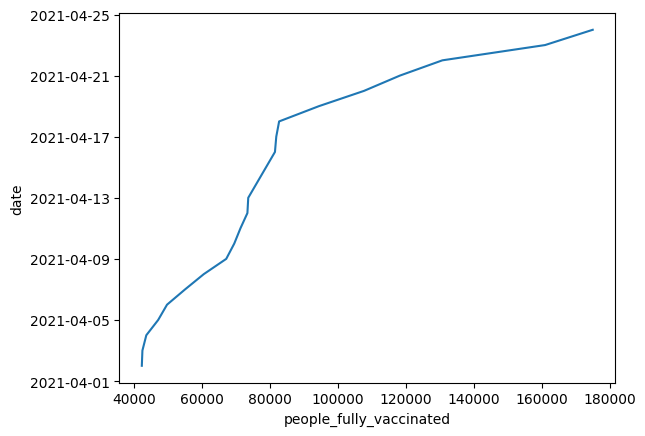

In [18]:
sns.lineplot(data=thDf,y='date',x='people_fully_vaccinated')

In [19]:
thDf.sort_values(by='date')
thDf.reset_index(drop=True)
thDf.head(5)


,continent,location,date,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,female_smokers,male_smokers,cardiovasc_death_rate,diabetes_prevalence,month_date,year_date,month_date_str,Max_people_fully_vaccinated
76795,Asia,Thailand,2021-04-12,49776.0,3635518.0,578532.0,505215.0,73317.0,1.9,38.8,109.861,7.04,2021-04,2021,2021-04,1727813.0
76796,Asia,Thailand,2021-04-13,48220.0,3683738.0,579305.0,505744.0,73561.0,1.9,38.8,109.861,7.04,2021-04,2021,2021-04,1727813.0
76799,Asia,Thailand,2021-04-16,52644.0,3829641.0,605259.0,523830.0,81429.0,1.9,38.8,109.861,7.04,2021-04,2021,2021-04,1727813.0
76800,Asia,Thailand,2021-04-17,55365.0,3885006.0,608521.0,526706.0,81815.0,1.9,38.8,109.861,7.04,2021-04,2021,2021-04,1727813.0
76801,Asia,Thailand,2021-04-18,56582.0,3941588.0,618583.0,535925.0,82658.0,1.9,38.8,109.861,7.04,2021-04,2021,2021-04,1727813.0


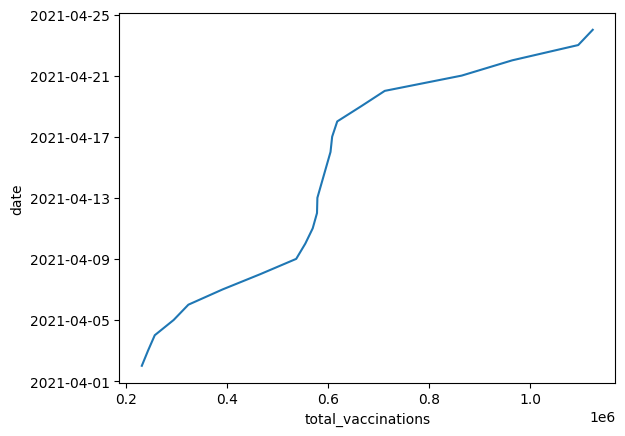

In [31]:
ax = sns.lineplot(data=thDf, x='total_vaccinations', y='date')
plt.show()


In [21]:
dedDf = pd.read_excel('/content/drive/MyDrive/Covid/CovidDeaths.xlsx')

In [22]:
dedDf.isnull().sum()

iso_code                                     0
continent                                 4111
location                                     0
date                                         0
total_cases                               2099
new_cases                                 2101
new_cases_smoothed                        3102
total_deaths                             11763
new_deaths                               11605
new_deaths_smoothed                       3102
total_cases_per_million                   2548
new_cases_per_million                     2550
new_cases_smoothed_per_million            3546
total_deaths_per_million                 12199
new_deaths_per_million                   12041
new_deaths_smoothed_per_million           3546
reproduction_rate                        16229
icu_patients                             76487
icu_patients_per_million                 76487
hosp_patients                            74357
hosp_patients_per_million                74357
weekly_icu_ad

In [23]:
dedDf=dedDf.fillna(0)
dedDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85171 non-null  object        
 1   continent                              85171 non-null  object        
 2   location                               85171 non-null  object        
 3   date                                   85171 non-null  datetime64[ns]
 4   total_cases                            85171 non-null  float64       
 5   new_cases                              85171 non-null  float64       
 6   new_cases_smoothed                     85171 non-null  float64       
 7   total_deaths                           85171 non-null  float64       
 8   new_deaths                             85171 non-null  float64       
 9   new_deaths_smoothed                    85171 non-null  float6

In [24]:
dedDf=dedDf[['date','location','total_cases','new_cases','total_deaths','new_deaths','people_vaccinated','people_fully_vaccinated','population','icu_patients']]
dedDf.reset_index()
dedDf.tail()



,date,location,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,icu_patients
85166,2021-04-26,Zimbabwe,38102.0,16.0,1560.0,3.0,353834.0,57776.0,14862927.0,0.0
85167,2021-04-27,Zimbabwe,38164.0,62.0,1565.0,5.0,370676.0,63263.0,14862927.0,0.0
85168,2021-04-28,Zimbabwe,38191.0,27.0,1565.0,0.0,388021.0,69992.0,14862927.0,0.0
85169,2021-04-29,Zimbabwe,38235.0,44.0,1567.0,2.0,400771.0,76826.0,14862927.0,0.0
85170,2021-04-30,Zimbabwe,38257.0,22.0,1567.0,0.0,414735.0,85607.0,14862927.0,0.0


In [25]:
dedTh = dedDf[dedDf['location']=='Thailand']
# dedTh=dedTh.dropna()
dedTh=dedTh.reset_index()
dedTh.drop(['index'], axis=1, inplace=True)
dedTh.head()

,date,location,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,icu_patients
0,2020-01-04,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0
1,2020-01-05,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0
2,2020-01-06,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0
3,2020-01-07,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0
4,2020-01-08,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0


In [26]:
pd.set_option('display.max_rows',None)



In [27]:
#ทำ%ผู้ฉีดต่อจำนวนประชากร
dedTh['pertentageVacination']=(dedTh['people_vaccinated'].max()/dedTh['population'])*100
dedTh['pertentageFullVacination']=(dedTh['people_fully_vaccinated'].max()/dedTh['population'])*100

In [28]:
dedTh.sort_values(by='date',ascending=False)
dedTh.head()


,date,location,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,icu_patients,pertentageVacination,pertentageFullVacination
0,2020-01-04,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706
1,2020-01-05,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706
2,2020-01-06,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706
3,2020-01-07,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706
4,2020-01-08,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706


In [29]:
dedTh['date_month']=dedTh['date'].dt.to_period('M')
dedTh['date_month_str'] = dedTh['date_month'].dt.strftime('%Y-%m')

,date,location,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,icu_patients,pertentageVacination,pertentageFullVacination,date_month,date_month_str,tempYlimDate,deathsPersentage
0,2020-01-04,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706,2020-01,2020-01,2020-04,NaN
1,2020-01-05,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706,2020-01,2020-01,2020-04,NaN
2,2020-01-06,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706,2020-01,2020-01,2020-04,NaN
3,2020-01-07,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706,2020-01,2020-01,2020-04,NaN
4,2020-01-08,Thailand,0.0,0.0,0.0,0.0,0.0,0.0,69799978.0,0.0,1.569098,0.54706,2020-01,2020-01,2020-04,NaN


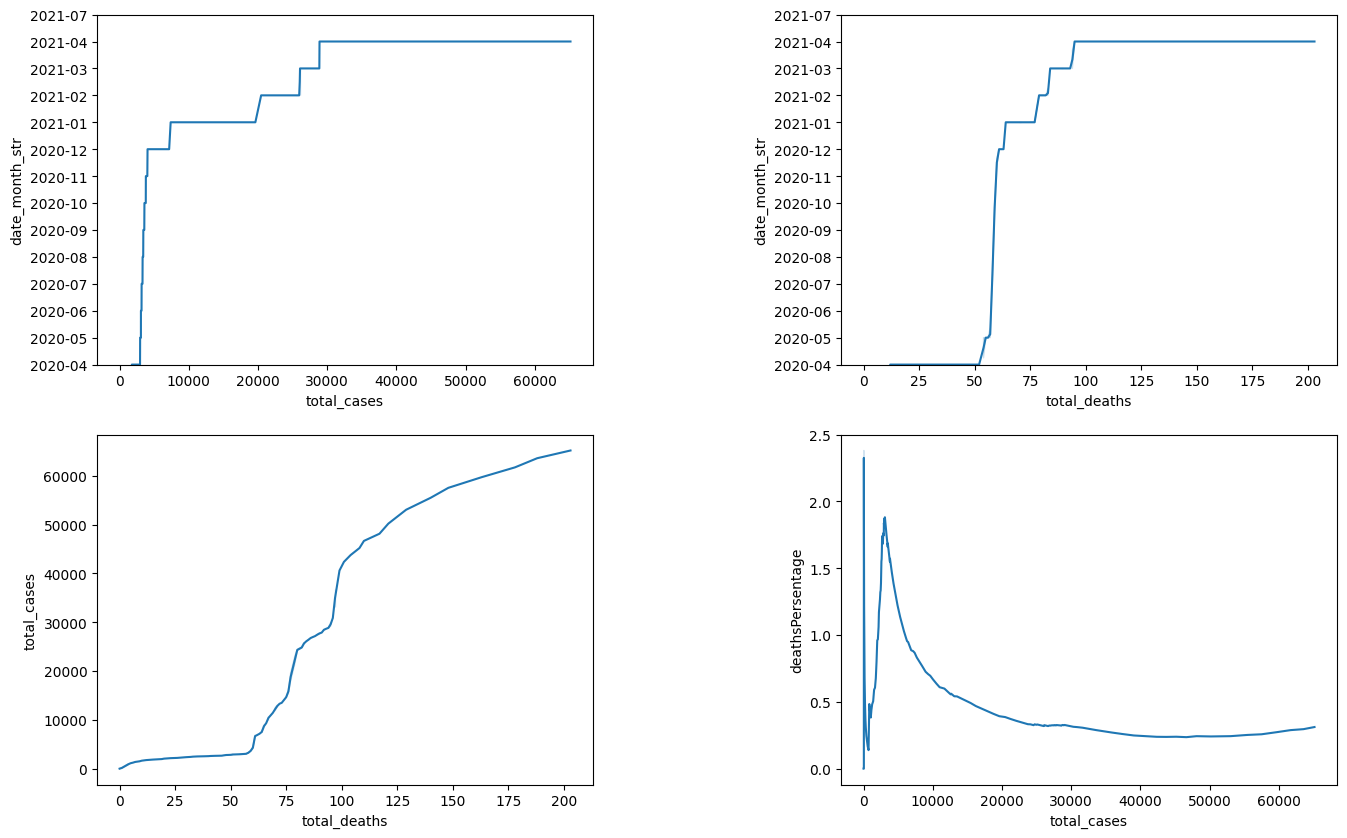

In [30]:
dedTh['tempYlimDate'] = pd.to_datetime(dedTh['date_month_str'].values)
dedTh['tempYlimDate']=dedTh.tempYlimDate+pd.DateOffset(months=3)
dedTh['tempYlimDate']=dedTh['tempYlimDate'].dt.strftime('%Y-%m')
dedTh.fillna(0)




f,axs = plt.subplots(2,2,figsize=(16,10),gridspec_kw=dict(width_ratios=[4,4]))
sns.lineplot(dedTh,y='date_month_str',x='total_cases',ax=axs[0,0])
sns.lineplot(dedTh,y='date_month_str',x='total_deaths',ax=axs[0,1])
sns.lineplot(dedTh,y='total_cases',x='total_deaths',ax=axs[1,0])
axs[0,0].set_ylim(dedTh['tempYlimDate'].min(), dedTh['tempYlimDate'].max())
axs[0,1].set_ylim(dedTh['tempYlimDate'].min(), dedTh['tempYlimDate'].max())
plt.subplots_adjust(wspace=0.5)


#ทำ pertentage อัตราการตายต่อผู้ติดเชื้อ


dedTh['deathsPersentage'] = (dedTh['total_deaths']/dedTh['total_cases'])*100
sns.lineplot(dedTh,y='deathsPersentage',x='total_cases',ax=axs[1,1])

dedTh.head(5)



